## **Load Data**

In [0]:
import pickle
import numpy as np

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/Udemy"

/content/drive/My Drive/Colab Notebooks/Udemy


In [0]:
with open('train_qa.txt', 'rb') as f:
  train_data = pickle.load(f)

with open('test_qa.txt', 'rb') as f:
  test_data = pickle.load(f)

In [0]:
print(type(test_data), type(train_data))

<class 'list'> <class 'list'>


In [0]:
print(len(train_data), len(test_data))

10000 1000


## **Expload the Data Format**

In [0]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [0]:
print(' '.join(train_data[0][0]))
print(' '.join(train_data[0][1]))
print(train_data[0][2])

Mary moved to the bathroom . Sandra journeyed to the bedroom .
Is Sandra in the hallway ?
no


## **Create Vocabulary**

In [0]:
all_data = test_data + train_data
len(all_data)

11000

In [0]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

vocab.add('yes')    
vocab.add('no')
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
vocab_len = len(vocab) + 1
vocab_len

38

In [0]:
all_story_len = [len(data[0]) for data in all_data]
max_story_len = max(all_story_len)
max_question_len = max([len(data[1]) for data in all_data])
print(max_story_len, max_question_len)

156 6


## **Vectorize data**

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

# Maps each word to an index
tokenizer.word_index

Using TensorFlow backend.


{'.': 4,
 '?': 27,
 'apple': 19,
 'back': 24,
 'bathroom': 23,
 'bedroom': 15,
 'daniel': 36,
 'discarded': 3,
 'down': 6,
 'dropped': 21,
 'football': 28,
 'garden': 18,
 'got': 1,
 'grabbed': 9,
 'hallway': 5,
 'in': 2,
 'is': 20,
 'john': 33,
 'journeyed': 25,
 'kitchen': 17,
 'left': 12,
 'mary': 7,
 'milk': 32,
 'moved': 29,
 'no': 14,
 'office': 11,
 'picked': 10,
 'put': 13,
 'sandra': 37,
 'the': 16,
 'there': 8,
 'to': 30,
 'took': 31,
 'travelled': 22,
 'up': 34,
 'went': 35,
 'yes': 26}

In [0]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answers in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answers)

In [0]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):

  # Stories = X
  X = []
  # QUESTIONS = Xq
  Xq = []
  # ANSWERS - (yes/no)
  Y = []

  for story, question, answer in data:
    # for each story
    # [[14, 13, 24, ...], [...], ..]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]

    y = np.zeros(len(word_index) + 1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)    

  return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
len(train_data)

10000

In [0]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [0]:
inputs_test

array([[ 0,  0,  0, ..., 16, 15,  4],
       [ 0,  0,  0, ..., 16, 18,  4],
       [ 0,  0,  0, ..., 16, 18,  4],
       ...,
       [ 0,  0,  0, ..., 16, 19,  4],
       [ 0,  0,  0, ..., 16, 18,  4],
       [ 0,  0,  0, ..., 19,  8,  4]], dtype=int32)

In [0]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
tokenizer.word_index['yes']

26

In [0]:
tokenizer.word_index['no']

14

In [0]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

## **Build Neural Network**

> Input Encoder M 

> Input Encoder C

> Question Encoder




In [0]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, add, dot, Dropout, Permute, concatenate, LSTM

In [0]:
input_sequence = Input((max_story_len, ))
question = Input((max_question_len, ))

vocab_size = len(vocab) + 1

In [0]:
# Input Encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

# (samples, story_max_len, embedding_dim)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Input Encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# (samples, story_max_len, question_max_len)

In [0]:
# Question Encoder 
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [0]:
# Encoded <==== Encoder(Input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
match = dot([input_encoded_m, question_encoded],axes=(2,2))
match = Activation('softmax')(match)
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

answer  = concatenate([response, question_encoded])
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [0]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [0]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

## **Execute Network**

>Fit/Train Network

>Plot out training history

>Evaluate on testset

>Create your own stories and questions

In [0]:
history = model.fit([inputs_train, queries_train], answers_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 4s 445us/step - loss: 1.5343 - acc: 0.4803 - val_loss: 0.6687 - val_acc: 0.5870
Epoch 2/50
10000/10000 [==============================] - 5s 450us/step - loss: 0.6510 - acc: 0.6238 - val_loss: 0.5531 - val_acc: 0.7450
Epoch 3/50
10000/10000 [==============================] - 5s 455us/step - loss: 0.5385 - acc: 0.7461 - val_loss: 0.4333 - val_acc: 0.8100
Epoch 4/50
10000/10000 [==============================] - 4s 449us/step - loss: 0.4554 - acc: 0.8114 - val_loss: 0.3927 - val_acc: 0.8330
Epoch 5/50
10000/10000 [==============================] - 4s 447us/step - loss: 0.4149 - acc: 0.8325 - val_loss: 0.3790 - val_acc: 0.8430
Epoch 6/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.3921 - acc: 0.8417 - val_loss: 0.3728 - val_acc: 0.8440
Epoch 7/50
10000/10000 [==============================] - 5s 453us/step - loss: 0.3681 - acc: 0.8453 - val_loss: 0.3626 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


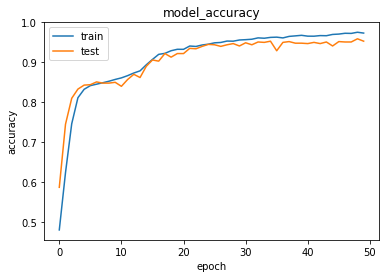

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('sample_chatbot.h5')

In [0]:
#model.load_weights('chatbot_10.h5')

In [0]:
pred_results = model.predict([inputs_test, queries_test])

In [0]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [0]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [0]:
test_data[0][2]

'no'

In [0]:
pred_results[0]

array([2.6610283e-17, 2.2337523e-17, 2.4148201e-17, 2.2576532e-17,
       2.4633781e-17, 2.7006658e-17, 6.0048479e-24, 2.4267881e-17,
       2.5368182e-17, 2.4547855e-17, 2.1803516e-17, 2.7866600e-17,
       2.4740858e-17, 2.5097993e-17, 9.9999964e-01, 2.5672991e-17,
       2.2420075e-17, 2.3471043e-17, 2.5794322e-17, 3.1817381e-24,
       2.2546753e-17, 2.7989118e-17, 2.1005224e-17, 2.8923118e-17,
       2.2442065e-17, 2.2908891e-17, 3.0460387e-07, 2.5279695e-17,
       3.2820601e-17, 2.4997094e-17, 2.7687737e-17, 2.4723595e-17,
       2.6337611e-17, 2.1703935e-17, 2.0482744e-17, 2.2044631e-17,
       2.6474504e-17, 2.6023919e-17], dtype=float32)

In [0]:
val_max = np.argmax(pred_results[0])
val_max

14

In [0]:
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key
    print(key)
k

no


'no'

In [0]:
pred_results[0][val_max]

0.99999964

In [0]:
my_story = "John left the kitchen . Sandra dropped football in the garden ."
my_story = my_story.split()
my_question = "Is the football in the garden ?"
my_question = my_question.split()

In [0]:
mydata = [(my_story, my_question, 'yes')]
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [0]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [0]:
pred_result = model.predict(([my_story, my_ques]))

In [0]:
val_max = np.argmax(pred_result[0])
for key, value in tokenizer.word_index.items():
  if value == val_max:
    k = key
k

'no'

In [0]:
pred_result[0][val_max]

0.9999633